# Shock Elasticity Computation

Shock elasticities quantifies the (local) exposures of macroeconomic cash flows to shocks over alternative investment horizons and the corresponding prices or investors’ compensations. This Jupyter notebook provides the computations for the shock elasticities for models that are exponential-quadratic.   This model structure is particularly tractable with quasi-analytical solutions. This notebook implements methods and formulas developed in [2] and [3].    
- Section 1 introduces the exponential–quadratic framework. It supposes this structure emerges as an approximation with the approxition taken as input into the computer code.  
- Section 2 presents shock elasticity formulas for both exposure and price elasticities.
- Section 3 provides an illustration using the long-run risk model [1].


# 1. Exponential–quadratic Framework

Consider a family of the dynamic systems 
$$
X_{t+1}(\mathrm{q})=\psi\left[X_t(\mathrm{q}), \mathrm{q} W_{t+1}, \mathrm{q}\right]
$$
parameterized by $\mathrm q$. Following [4] (Lombardo and Uhlig) (International Economics Review), we consider a second-order approximation of stochastic processes
around the ``small noise'' limit ${\mathrm q} = 0$:
$$
X_t(\mathrm {q}) \approx X_{0, t}+ {\mathrm q} X_{1, t}+\frac{{\mathrm q}^2}{2} X_{2, t}
$$
where $X_{m,t}$ is the date $t$, $m^{th}$-order derivatitve approximation. 

Write the recursive evolution for these derivative processes as:
\begin{aligned}
X_{0, t}=& \bar{x}\\
X_{1, t+1}=&\Theta_{10}+\Theta_{11} X_{1, t}+\Lambda_{10} W_{t+1}\\
X_{2, t+1}= & \Theta_{20}+\Theta_{21} X_{1, t}+\Theta_{22} X_{2, t}+\Theta_{23}\left(X_{1, t} \otimes X_{1, t}\right) +\Lambda_{20} W_{t+1}+\Lambda_{21}\left(X_{1, t} \otimes W_{t+1}\right) +\Lambda_{22}\left(W_{t+1} \otimes W_{t+1}\right) .
\end{aligned}
For instance, 
\begin{aligned}
\bar{x} = &\  \psi(\bar x, 0, 0 ) \\
\Theta_{11} = &\  \psi_1 \\
\Lambda_{10} = &\  \psi_2\\
\Theta_{10} = &\  \psi_3
\end{aligned}
where $\psi_i$ is the derivative of $\psi$ with respect to argument $i$ evaluated at $(\bar x, 0, 0).$

We suppose that the logarithms of macroeconomic and stochastic discount factor processes that interest us grow or decay stochastically over time with stationary increments.  Let $Y$ be the logarithm of such a process. We use the exponential of $M = \exp (Y)$, to capture growth or decay in levels. In what follows, $M$ will be a macro growth process, a stochastic discount factor process, or a product of the two. Again we find it advantageous to embed this in a parameterized family of process with increments given by: 
$$
Y_{t+1}(\mathrm q)-Y_t({\textrm q})=\kappa\left[X_t({\textrm q}), {\textrm q} W_{t+1}, {\textrm q}\right]
$$
We approximate the resulting processes expressed in logarithms as:
$$
Y_{t+1}(\mathrm q)-Y_t({\textrm q}) \approx Y_{0, t+1}-Y_{0, t}+ {\textrm q} (Y_{1, t+1} -Y_{1, t})+\frac{{\textrm q}^2}{2} (Y_{2, t+1}-Y_{2, t})
$$
Following the steps of our approximation of $X$, we write
$$
\begin{aligned}
Y_{t+1}^0 - Y_t^0 = & \kappa\left({\bar x},0,0 \right) \\
Y_{t+1}^1-Y_t^1 = & \kappa_1 X_{1,t} + \kappa_2 W_{t+1} + \kappa_3 \\
Y_{t+1}^2-Y_t^2 = & \kappa_1 X_{2,t} + \left( X_{1,t} \right)' \kappa_{22} X_{1.t} + 2 \left(X_{1,t}\right)' \kappa_{1,2} W_{t+1} +  \left( W_{t+1} \right)' \kappa_{22} W_{t+1} + \kappa_{33} 
\end{aligned}
$$
where $\kappa_i$ is the derivative of $\kappa$ with respect to argument $i$ evaluated at $(\bar x, 0, 0)$ and similarly for the second derivatives.  


# 2. Shock Elasticity
## 2.1 Analytical framework
The shock elasticity is used to quantify the date $t$ impact on values of exposure to the shock $\alpha_h(x)W_1$ at date one. It has the analytical form shown in equation 1
$$
\varepsilon(x, t)=\alpha_h(x) \cdot \frac{E\left[M_t W_1 \mid X_0=x\right]}{E\left[M_t \mid X_0=x\right]}\tag{1}
$$

Using the approximations we just displayed, the computer software computes as an essential input into the shock elasticities: 
$$
\log E\left[\frac {M_t}{M_0}  \mid X_0=x\right] \approx \Phi_{0, t}^*+\Phi_{1, t}^* X_{1,0}+\Phi_{2, t}^* X_{2,0} +\Phi_{3, t}^*\left(X_{1,0} \otimes X_{1,0}\right)\tag{2}
$$

To compute shock elasticities given in equation 2 under the exponential–quadratic framework, we can construct:
$$\frac{E\left[M_t W_1 \mid X_0=x\right]}{E\left[M_t \mid X_0=x\right]}=\frac{E\left[M_1 E\left(\frac{M_t}{M_1} \mid X_1\right) W_1 \mid X_0=x\right]}{E\left[M_1 E\left(\frac{M_t}{M_1} \mid X_1\right) \mid X_0=x\right]} .$$
where we define 
$$L_{1, t}\equiv\frac{M_1 E\left(\frac{M_t}{M_1} \mid X_1\right)}{E\left[M_1 E\left(\frac{M_t}{M_1} \mid X_1\right) \mid X_0=x\right]}\tag{3}$$

Notice that this random variable has conditional expectation one. Multiplying this positive random
variable by $W_1$ and taking expectations is equivalent to changing the conditional probability distribution and evaluating the conditional expectation of $W_1$ under this change of measure. Under the transformed measure, $W_1$ remains normally distributed.

## 2.2 Approximation under the Exponential–quadratic Framework
Suppose the conditional expectation of a multiplicative functional can be expressed as equation 1. Under the transformed measure, the covariance matrix of $W_1$ is:
$$
\begin{aligned}
\tilde{\Sigma}_t= & {\left[I_k-2 \operatorname{sym}\left(\operatorname {mat} _ { k , k } \left[\Psi_2+\Phi_{2, t-1}^* \Lambda_{22}\right.\right.\right.} \left.\left.\left.+\Phi_{3, t-1}^*\left(\Lambda_{10} \otimes \Lambda_{10}\right)\right]\right)\right]^{-1}
\end{aligned}\tag{4}
$$
where $I_k$ is the identity matrix of dimension $k$. We suppose that this matrix is positive definite. The conditional mean vector for $W_1$ under the change of measure is:
$$
\tilde{E}\left[W_1 \mid X_0=x\right]=\widetilde{\Sigma}_t\left[\mu_{t, 0}+\mu_{t, 1} x_1\right]
$$
where $\tilde{E}$ is the expectation under the change of measure and the coefficients $μ_{t,0}$ and $μ_{t,1}$ are
$$
\begin{aligned}
\mu_{0, t}= & {\left[\Psi_1+\Phi_{1, t-1}^* \Lambda_{1,0}+\Phi_{2, t-1}^* \Lambda_{20}\right.} \left.+\Phi_{3, t-1}^*\left(\Theta_{10} \otimes \Lambda_{10}+\Lambda_{10} \otimes \Theta_{10}\right)\right]^{\prime} \\
\mu_{1, t}= & \operatorname{mat}_{k, n}\left[\Psi_1+\Phi_{2, t-1}^* \Lambda_{21}\right.  \left.+\Phi_{3, t-1}^*\left(\Theta_{11} \otimes \Lambda_{10}+\left[\Lambda_{10} \otimes\left(\Theta_{11}\right)_{\bullet j}\right]_{j=1}^n\right)\right]
\end{aligned}\tag{5}
$$
Thus the shock elasticity is given by:
$$
\begin{aligned}
\varepsilon(x, t) & =\alpha_h(x) \cdot E\left[L_{1, t} W_1 \mid X_0=x\right] \\
& =\alpha_h(x)^{\prime} \widetilde{\Sigma}_t\left[\mu_{t, 0}+\mu_{t, 1} x_1\right]
\end{aligned}\tag{6}
$$
The shock elasticity function in this environment depends on the first component, $x_1$, of the state vector. The coefficient matrices for the evolution of the second component, $x_2$, nevertheless matter for the shock elasticities even though these elasticities do not depend on this component of the state vector.[^2]

[^2]: The derivation details to compute the conditional moments under the change of measure $L_{1,t}$ can be found in Jaroslav and Hansen (2016), Appendix B.


In [208]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

## 2.1 Recursive Mappings 
Equation 1 can be computed recursively as
$$
\begin{aligned}
\log E\left[M_t \mid \mathscr{F}_0\right]=&\log E\left[\exp \left(Y_1-Y_0\right) E\left[\frac{M_t}{M_1} \mid \mathscr{F}_1\right] \mid \mathscr{F}_0\right]\\
= & \left(\bar{\Gamma}_0\right)_t+\left(\bar{\Gamma}_1\right)_t X_{1,0}+\left(\bar{\Gamma}_2\right)_t X_{2,0} +\left(\bar{\Gamma}_3\right)_t\left(X_0 \otimes X_0\right)
\end{aligned}
$$
This is done by iteratively using two mappings $ \overline{\mathcal{E}}$ and $ \tilde{\mathcal{E}}$
$$
\overline{\mathcal{P}}_t=\overline{\mathscr{E}}\left(\mathcal{P}+\tilde{\mathscr{E}}\left(\overline{\mathcal{P}}_{t-1}\right)\right)
$$
For the set of parameters $\mathcal{P}=\left(\Gamma_0, \ldots, \Gamma_3, \Psi_0, \ldots, \Psi_2\right)$, the mapping $\overline{\mathcal{P}}=\overline{\mathcal{E}}(\mathcal{P})$ calculates the parameter sets $\overline{\mathcal{P}}=(\bar{\Gamma}_0, \bar{\Gamma}_1, \bar{\Gamma}_2, \bar{\Gamma}_3)$ 
$$
\begin{aligned}
\bar{Y}\left(X_t\right)&=\log E\left[\exp \left(Y_{t+1}-Y_t\right) \mid \mathscr{F}_t\right]\\
&=\bar{\Gamma}_0+\bar{\Gamma}_1 X_{1, t}+\bar{\Gamma}_2 X_{2, t}+\bar{\Gamma}_3\left(X_{1, t} \otimes X_{1, t}\right)
\end{aligned}
$$

The mapping $\tilde{\mathcal{P}}=\tilde{\mathscr{E}}(\overline{\mathcal{P}})$ calculates the parameter sets $\tilde{\mathcal{P}}=(\tilde{\Gamma}_0, \ldots,\tilde{\Gamma}_3, \tilde{\Psi}_0, \ldots,\tilde{\Psi}_2)$ 
$$
\begin{aligned}
\tilde{Y}\left(X_{t-1}, W_t\right)= & \log E\left[\exp \left(Y_{t+1}-Y_t\right) \mid \mathscr{F}_t\right] \\
= & \tilde{\Gamma}_0+\tilde{\Gamma}_1 X_{1, t-1}+\tilde{\Gamma}_2 X_{2, t-1}+\tilde{\Gamma}_3\left(X_{1, t-1} \otimes X_{1, t-1}\right) +\tilde{\Psi}_0 W_t+\tilde{\Psi}_1\left(X_{1, t-1} \otimes W_t\right)+\tilde{\Psi}_2\left(W_t \otimes W_t\right)
\end{aligned}
$$

The function *\_Φ\_star* calculates $\Phi_{0, t}^*, \Phi_{1, t}^*, \Phi_{2, t}^*,\Phi_{3, t}^*$ in equation 1 with two recusive mappings.

In [209]:
def _Φ_star(log_M_growth, X1_tp1, X2_tp1, T):
    r"""
    Computes :math:`\Phi^*_{0,t-1}`, :math:`\Phi^*_{1,t-1}`, :math:`\Phi^*_{2,t-1}`, :math:`\Phi^*_{3,t-1}`.

    Parameters
    ----------
    log_M_growth : LinQuadVar
        Log growth of multiplicative functional M.
        e.g. log consumption growth, :math:`\log \frac{C_{t+1}}{C_t}`
    X1_tp1 : LinQuadVar
        Stores the coefficients of laws of motion for X1.
    X2_tp2 : LinQuadVar or None
        Stores the coefficients of laws of motion for X2.
    T : int
        Time horizon.

    Returns
    -------
    Φ_star_1tm1_all : (T, 1, n_X) ndarray
    Φ_star_2tm1_all : (T, 1, n_X) ndarray
    Φ_star_3tm1_all : (T, 1, n_X**2) ndarray

    """
    _, n_X, _ = X1_tp1.shape
    
    Φ_star_1tm1_all = np.zeros((T, 1, n_X))
    Φ_star_2tm1_all = np.zeros((T, 1, n_X))
    Φ_star_3tm1_all = np.zeros((T, 1, n_X**2))
    log_M_growth_distort = log_E_exp(log_M_growth)
    X1X1 = kron_prod(X1_tp1, X1_tp1)

    for i in range(1, T):
        Φ_star_1tm1_all[i] = log_M_growth_distort['x']
        Φ_star_2tm1_all[i] = log_M_growth_distort['x2']
        Φ_star_3tm1_all[i] = log_M_growth_distort['xx']
        temp = next_period(log_M_growth_distort, X1_tp1, X2_tp1, X1X1)
        log_M_growth_distort = log_E_exp(log_M_growth + temp)

    return Φ_star_1tm1_all, Φ_star_2tm1_all, Φ_star_3tm1_all

## 2.2 Moments under the Change of Measure

With $\Phi_{0, t}^*, \Phi_{1, t}^*, \Phi_{2, t}^*,\Phi_{3, t}^*$ in hand, we are able to calculate the distorted co-variance matrix $\tilde{\Sigma}_t$ and conditional expectation coefficients $μ_{t,0}$ and $μ_{t,1}$ in equation 4 and 5, under the change of measure $L_{1,t}$, using the function *\_elasticity\_coeff* defined below.


In [210]:
from numba import njit, prange
def _elasticity_coeff(log_M_growth, X1_tp1, X2_tp1, T):
    r"""
    Computes :math:`\mu_{t,0}`, :math:`\mu_{t,1}`, :math:`\tilde{\Sigma}_t`

    Parameters
    ----------
    log_M_growth : LinQuadVar
        Log difference of multiplicative functional.
        e.g. log consumption growth, :math:`\log \frac{C_{t+1}}{C_t}`
    X1_tp1 : LinQuadVar
        Stores the coefficients of laws of motion for X1.
    X2_tp2 : LinQuadVar or None
        Stores the coefficients of laws of motion for X2.        
    T : int
        Time horizon.

    Returns
    -------
    Σ_tilde_t_all : (T, n_W, n_W) ndarray
    μ_t0_all : (T, n_W, 1) ndarray
    μ_t1_all : (T, n_W, n_X) ndarray

    """
    _, n_X, n_W = log_M_growth.shape
    
    Φ_star_1tm1_all, Φ_star_2tm1_all, Φ_star_3tm1_all = _Φ_star(log_M_growth, X1_tp1, X2_tp1, T)
    Ψ_0 = log_M_growth['w']
    Ψ_1 = log_M_growth['xw']
    Ψ_2 = log_M_growth['ww']
    Λ_10 = X1_tp1['w']
    if log_M_growth.second_order:
        Λ_20 = X2_tp1['w']
        Λ_21 = X2_tp1['xw']
        Λ_22 = X2_tp1['ww']
    else:
        Λ_20 = np.zeros((n_X,n_W))
        Λ_21 = np.zeros((n_X,n_X*n_W))
        Λ_22 = np.zeros((n_X,n_W**2))
    Θ_10 = X1_tp1['c']
    Θ_11 = X1_tp1['x']
    
    Σ_tilde_t_all, μ_t0_all, μ_t1_all \
        = _elasticity_coeff_inner_loop(Φ_star_1tm1_all, Φ_star_2tm1_all, Φ_star_3tm1_all, Ψ_0, Ψ_1, Ψ_2, Λ_10, Λ_20, Λ_21, Λ_22, Θ_10, Θ_11, n_X, n_W, T)   
    
    return Σ_tilde_t_all, μ_t0_all, μ_t1_all

@njit
def _elasticity_coeff_inner_loop(Φ_star_1tm1_all, Φ_star_2tm1_all, Φ_star_3tm1_all, Ψ_0, Ψ_1, Ψ_2, Λ_10, Λ_20, Λ_21, Λ_22, Θ_10, Θ_11, n_X, n_W, T):
    
    Σ_tilde_t_all = np.zeros((T, n_W, n_W))
    μ_t0_all = np.zeros((T, n_W, 1))
    μ_t1_all = np.zeros((T, n_W, n_X))    

    kron_Λ_10_Λ_10 = np.kron(Λ_10,Λ_10)
    kron_Θ_10_Λ_10_sum = np.kron(Θ_10,Λ_10) + np.kron(Λ_10,Θ_10)

    temp = np.kron(Λ_10, Θ_11[:, 0:1].copy())
    for j in range(1, n_X):
        temp = np.hstack((temp, np.kron(Λ_10, Θ_11[:, j:j+1].copy())))

    kron_Θ_11_Λ_10_term = np.kron(Θ_11, Λ_10) + temp

    for t in prange(T):
        Φ_star_1tm1 = Φ_star_1tm1_all[t]
        Φ_star_2tm1 = Φ_star_2tm1_all[t]
        Φ_star_3tm1 = Φ_star_3tm1_all[t]

        Σ_tilde_t_inv = np.eye(n_W)- 2 * sym(mat(Ψ_2 + Φ_star_2tm1@Λ_22 + Φ_star_3tm1@kron_Λ_10_Λ_10, (n_W, n_W)))
        μ_t0 = (Ψ_0 + Φ_star_1tm1@Λ_10 + Φ_star_2tm1@Λ_20  + Φ_star_3tm1 @ kron_Θ_10_Λ_10_sum).T
        μ_t1 = mat(Ψ_1 + Φ_star_2tm1 @ Λ_21 + Φ_star_3tm1 @ kron_Θ_11_Λ_10_term,(n_W, n_X))
        Σ_tilde_t_all[t] = np.linalg.inv(Σ_tilde_t_inv)
        μ_t0_all[t] = μ_t0
        μ_t1_all[t] = μ_t1
    
    return Σ_tilde_t_all, μ_t0_all, μ_t1_all

## 2.3 Exposure Elasticity and Price Elasticity

We consider two types of multiplicative functionals, one that captures macroeconomic growth, denoted by $G$, and another that captures stochastic discounting, denoted by $S$. 
- The stochastic nature of discounting is needed to adjust consumption processes or cash flows for risk. 
- Thus $S$, and sometimes $G$ as well, are computed from the underlying economic model to reflect equilibrium price dynamics. 
- For instance, $G$ might be a consumption process or some other endogenously determined cash flow, or it might be an exogenously specified technology shock process that grows through time.  
- The interplay between $S$ and $G$ will dictate valuation over multi-period investment horizons.

Consider the pricing of a vector of payoffs $G_tW_1$ in comparison to the scalar payoff $G_t$. 
- The **shock-exposure elasticity** is constructed from the ratio of expected payoffs $E[G_tW_1 |X_0 =x]$ relative to $E [G_t | X_0 = x]$.
 - To calcualte shock-exposure elasticity, the multiplicative functional $M$ is set as $G$.
 - This is done by the function *\_exposure\_elasticity*. This function uses the *\_elasticity\_coeff* defined in the last section. 
- The **shock-price elasticity** includes an adjustment for the values of the payoffs $E [S_t G_t W_1 | X_0 = x]$ relative to $E [S_t G_t | X_0 = x]$. 
 - To calcualte shock-price elasticity, the multiplicative functional $M$ is set as the product $SG$.
 - This is done by the function *price\_elasticity*. This function also uses the *\_elasticity\_coeff* defined in the last section. 
 
Since the shock elasticity function depends on the first component, $x_1$, of the state vector. We can calculates the percentile of the shock elasticity based on the stationary distribution of $x_1$. This is done by the internal function *\_compute\_percentile* in *exposure\_elasticity* and *price\_elasticity*. 

In [211]:
def exposure_elasticity(log_M_growth, X1_tp1, X2_tp1, T=400, shock=0, percentile=0.5):
    r"""
    Computes exposure elasticity for M.

    Parameters
    ----------
    log_M_growth : LinQuadVar
        Log growth of multiplicative functional M.
        e.g. log consumption growth, :math:`\log \frac{C_{t+1}}{C_t}`
    X1_tp1 : LinQuadVar
        Stores the coefficients of laws of motion for X1.
    X2_tp1 : LinQuadVar
        Stores the coefficients of laws of motion for X2.        
    T : int
        Time horizon.
    shock : int
        Position of the initial shock, starting from 0.
    percentile : float
        Specifies the percentile of the elasticities.

    Returns
    -------
    elasticities : (T, n_Y) ndarray
        Exposure elasticities.

    """
    n_Y, n_X, n_W = log_M_growth.shape
    if n_Y != 1:
        raise ValueError("The dimension of input should be 1.")

    α = np.zeros(n_W)
    α[shock] = 1    
    p = norm.ppf(percentile)

    Σ_tilde_t, μ_t0, μ_t1 = _elasticity_coeff(log_M_growth, X1_tp1, X2_tp1, T)

    kron_product = np.kron(X1_tp1['x'], X1_tp1['x'])
    x_cov = mat(np.linalg.solve(np.eye(n_X**2)-kron_product, vec(X1_tp1['w']@X1_tp1['w'].T)), (n_X, n_X))

    elasticities = _exposure_elasticity_loop(T, n_Y, α, Σ_tilde_t, μ_t0, μ_t1, percentile, x_cov, p)

    return elasticities

@njit(parallel=True)
def _exposure_elasticity_loop(T, n_Y, α, Σ_tilde_t, μ_t0, μ_t1, percentile, x_cov, p):
    elasticities = np.zeros((T, n_Y))
    if percentile == 0.5:
        for t in prange(T):
            elasticity = (α@Σ_tilde_t[t]@μ_t0[t])[0]
            elasticities[t] = elasticity
    else:
        for t in prange(T):
            elasticity = (α@Σ_tilde_t[t]@μ_t0[t])[0]
            A = α@Σ_tilde_t[t]@μ_t1[t]
            elasticity = _compute_percentile(A, elasticity, x_cov, p)
            elasticities[t] = elasticity
    return elasticities

In [212]:
def price_elasticity(log_G_growth, log_S_growth, X1_tp1, X2_tp1, T=400, shock=0, percentile=0.5):
    r"""
    Computes price elasticity.

    Parameters
    ----------
    log_G_growth : LinQuadVar
        Log growth of multiplicative functional G.
        e.g. log consumption growth, :math:`\log \frac{C_{t+1}}{C_t}`
    log_S_growth : LinQuadVar
        Log growth of multiplicative functional S.
        e.g. log stochastic discount factor, :math:`\log \frac{S_{t+1}}{S_t}`
    X1_tp1 : LinQuadVar
        Stores the coefficients of laws of motion for X1.
    X2_tp2 : LinQuadVar or None
        Stores the coefficients of laws of motion for X2.        
    T : int
        Time horizon.
    shock : int
        Position of the initial shock, starting from 0.
    percentile : float
        Specifies the percentile of the elasticities.

    Returns
    -------
    elasticities : (T, dim) ndarray
        Price elasticities.
        
    """
    if log_G_growth.shape != log_S_growth.shape:
        raise ValueError("The dimensions of G and S do not match.")
    else:
        n_Y, n_X, n_W = log_G_growth.shape
        if n_Y != 1:
            raise ValueError("The dimension of inputs should be (1, n_X, n_W)")
    α = np.zeros(n_W)
    α[shock] = 1          

    p = norm.ppf(percentile)

    Σ_tilde_expo_t, μ_expo_t0, μ_expo_t1 \
        = _elasticity_coeff(log_G_growth, X1_tp1, X2_tp1, T)
    Σ_tilde_value_t, μ_value_t0, μ_value_t1\
        = _elasticity_coeff(log_G_growth+log_S_growth, X1_tp1, X2_tp1, T)

    kron_product = np.kron(X1_tp1['x'], X1_tp1['x'])
    x_cov = mat(np.linalg.solve(np.eye(n_X**2)-kron_product,
                                vec(X1_tp1['w']@X1_tp1['w'].T)), (n_X, n_X))
    
    elasticities = _price_elasticity_loop(T, n_Y, α, Σ_tilde_expo_t, Σ_tilde_value_t, 
                           μ_expo_t0, μ_value_t0, μ_expo_t1, μ_value_t1,
                           percentile, x_cov, p)

    return elasticities

@njit(parallel=True)
def _price_elasticity_loop(T, n_Y, α, Σ_tilde_expo_t, Σ_tilde_value_t, 
                           μ_expo_t0, μ_value_t0, μ_expo_t1, μ_value_t1,
                           percentile, x_cov, p):
    elasticities = np.zeros((T, n_Y))
    if percentile == 0.5:
        for t in prange(T):
            elasticity = (α @ (Σ_tilde_expo_t[t] @ μ_expo_t0[t] - Σ_tilde_value_t[t] @ μ_value_t0[t]))[0]
            elasticities[t] = elasticity        
    else:
        for t in prange(T):
            elasticity = (α @ (Σ_tilde_expo_t[t] @ μ_expo_t0[t] - Σ_tilde_value_t[t] @ μ_value_t0[t]))[0]
            A = α @ (Σ_tilde_expo_t[t]@μ_expo_t1[t] - Σ_tilde_value_t[t]@μ_value_t1[t])
            elasticity = _compute_percentile(A, elasticity, x_cov, p)
            elasticities[t] = elasticity
    return elasticities

In [213]:
@njit
def _compute_percentile(A, Ax_mean, x_cov, p):
    """
    Compute percentile of the scalar Ax, where A is vector coefficient and
    x follows multivariate normal distribution.
    
    Parameters
    ----------
    A : (N, ) ndarray
        Coefficient of Ax.
    Ax_mean : float
        Mean of Ax.
    x_cov : (N, N) ndarray
        Covariance matrix of x.
    p : float
        Percentile of a standard normal distribution.

    Returns
    -------
    res : float
        Percentile of Ax.

    """
    Ax_var = A@x_cov@A.T
    Ax_std = np.sqrt(Ax_var)
    res = Ax_mean + Ax_std * p
    return res

# 3. An application in the BY model

## 3.1 Calculate Exposure Elasticity for Consumption Growth

The below example uses the BY model numerical results in the exponential–quadratic framework to calcualte shock elasticities. The variable in the exponential–quadratic framework are expressed in a Python class named *LinQuadVar*, which stores all matrix coefficients for addictive functionals. The *LinQuadVar* allows the add and multiply operations.

To calculate the exposure elasticity for consumption growth using the *exposure\_elasticity* defined above, we need six inputs
- Consumption growth under the original measure, *gc\_tp1*, loaded from an outside solution. This is a *LinQuadVar* object. 
- First order expansion of the state evolution equations under the original measure, *Z1\_tp1*, loaded from an outside solution. This is a *LinQuadVar* object. 
- Second order expansion of the state evolution equations under the original measure, *Z2\_tp1*, loaded from an outside solution. This is a *LinQuadVar* object. 
- Time periods, $\text{T} = 360$, 30 years
- Shock index, $0$ stands for the first shock
- Percentile, $0.5$ stands for the median

In [214]:
import pickle
import numpy as np
np.set_printoptions(suppress=True)
import os
import sys
sys.path.insert(0, os.getcwd()+'/expansion_suite')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(font_scale = 1.5)
from elasticity import exposure_elasticity, price_elasticity
from lin_quad_util import next_period
from lin_quad import LinQuadVar
T = 360
# load the BY model solution when ρ = 2/3
with open('data/res_006.pkl', 'rb') as f:
    res_006 = pickle.load(f)
# load the BY model solution when ρ = 1
with open('data/res_010.pkl', 'rb') as f:
    res_010 = pickle.load(f)
# load the BY model solution when ρ = 1.5
with open('data/res_015.pkl', 'rb') as f:
    res_015 = pickle.load(f)
# load the BY model solution when ρ = 10
with open('data/res_100.pkl', 'rb') as f:
    res_100 = pickle.load(f)

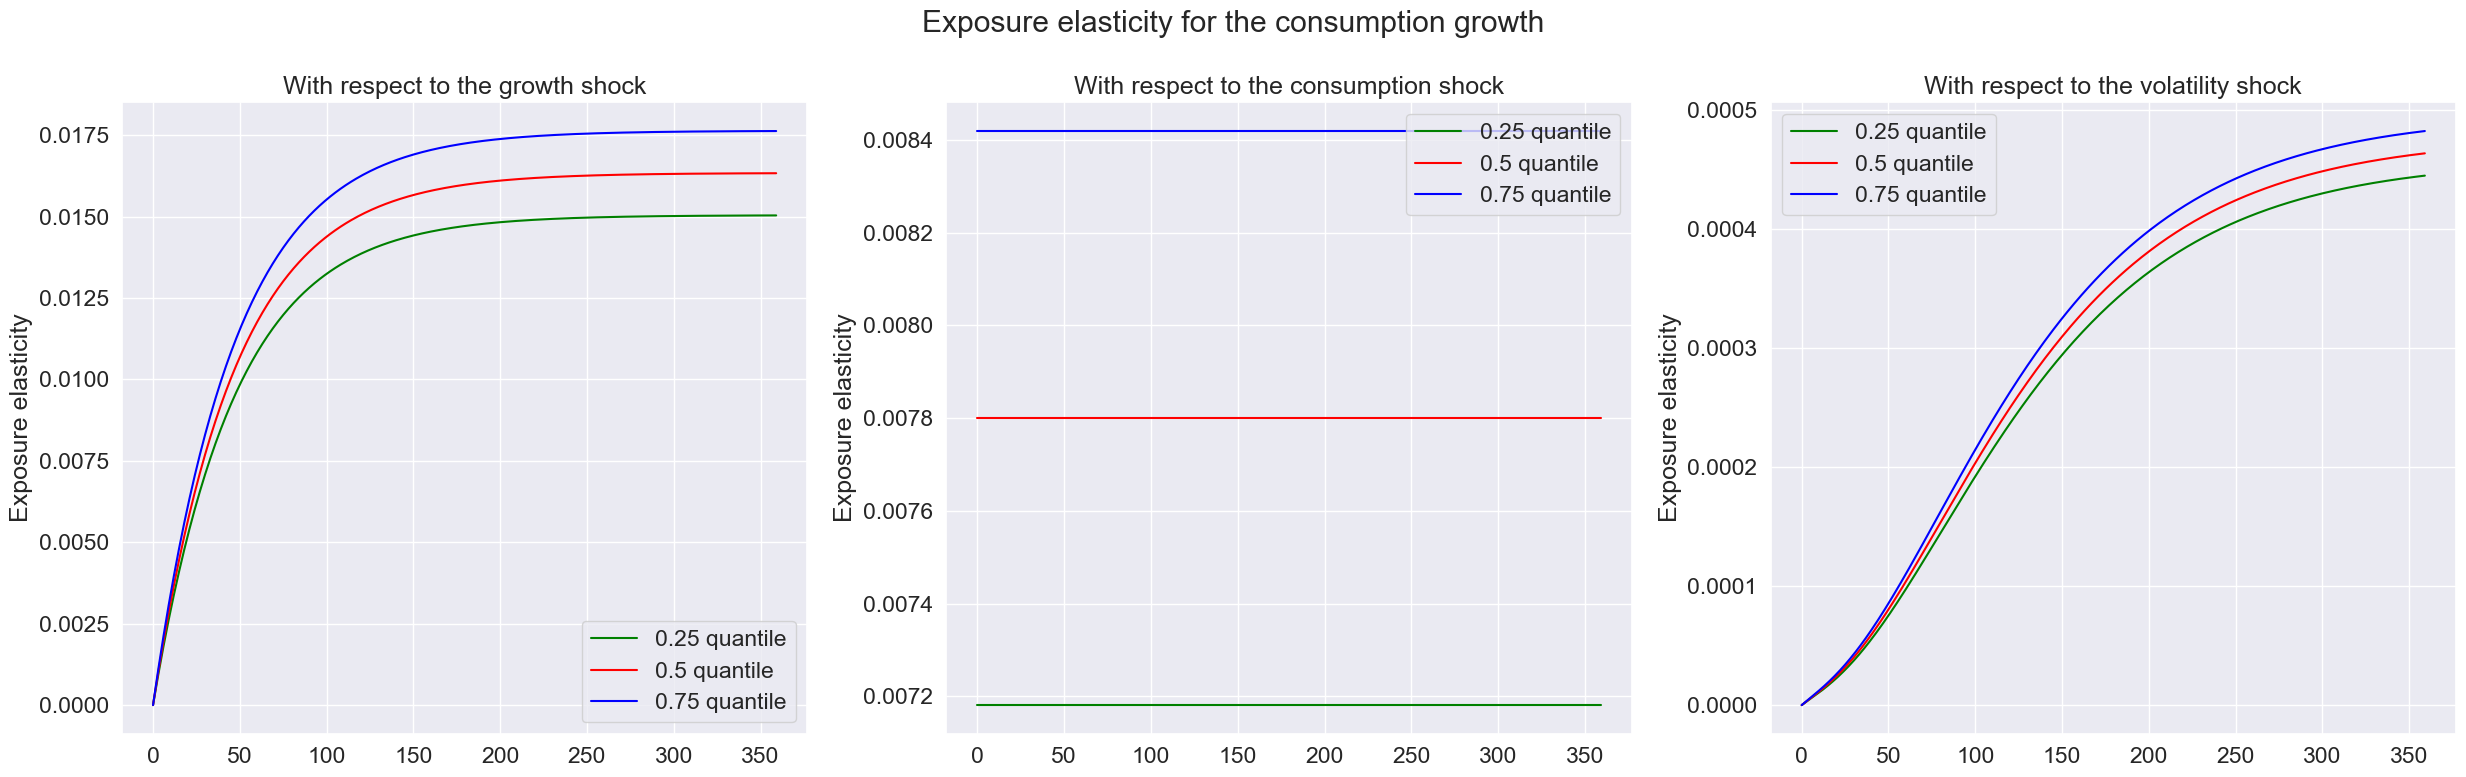

In [215]:
gc_tp1 = res_015['no_N_res']['X_tp1'][6]
Z1_tp1 = res_015['no_N_res']['Z1_tp1']
Z2_tp1 = res_015['no_N_res']['Z2_tp1']

## Calculation for exposure elasticity for consumption growth
expo_elas_shock_0_015 = [exposure_elasticity(gc_tp1, Z1_tp1, Z2_tp1, T, shock=0, percentile=p) for p in [0.25, 0.5, 0.75]]
expo_elas_shock_1_015 = [exposure_elasticity(gc_tp1, Z1_tp1, Z2_tp1, T, shock=1, percentile=p) for p in [0.25, 0.5, 0.75]]
expo_elas_shock_2_015 = [exposure_elasticity(gc_tp1, Z1_tp1, Z2_tp1, T, shock=2, percentile=p) for p in [0.25, 0.5, 0.75]]

## Plot the exposure elasticity for consumption growth
fig, axes = plt.subplots(1,3, figsize = (25,8))
expo_elas_shock_0 = pd.DataFrame([np.arange(T),expo_elas_shock_0_015[0].flatten(),expo_elas_shock_0_015[1].flatten(),expo_elas_shock_0_015[2].flatten()]).T
expo_elas_shock_0.columns = ['T','0.25 quantile','0.5 quantile','0.75 quantile']
expo_elas_shock_1 = pd.DataFrame([np.arange(T),expo_elas_shock_1_015[0].flatten(),expo_elas_shock_1_015[1].flatten(),expo_elas_shock_1_015[2].flatten()]).T
expo_elas_shock_1.columns = ['T','0.25 quantile','0.5 quantile','0.75 quantile']
expo_elas_shock_2 = pd.DataFrame([np.arange(T),expo_elas_shock_2_015[0].flatten(),expo_elas_shock_2_015[1].flatten(),expo_elas_shock_2_015[2].flatten()]).T
expo_elas_shock_2.columns = ['T','0.25 quantile','0.5 quantile','0.75 quantile']
sns.lineplot(data = expo_elas_shock_0,  x = 'T', y = '0.25 quantile', ax=axes[0], color = 'green',label = '0.25 quantile')
sns.lineplot(data = expo_elas_shock_0,  x = 'T', y = '0.5 quantile', ax=axes[0], color = 'red',label = '0.5 quantile')
sns.lineplot(data = expo_elas_shock_0,  x = 'T', y = '0.75 quantile', ax=axes[0], color = 'blue',label = '0.75 quantile')
sns.lineplot(data = expo_elas_shock_1,  x = 'T', y = '0.25 quantile', ax=axes[2], color = 'green',label = '0.25 quantile')
sns.lineplot(data = expo_elas_shock_1,  x = 'T', y = '0.5 quantile', ax=axes[2], color = 'red',label = '0.5 quantile')
sns.lineplot(data = expo_elas_shock_1,  x = 'T', y = '0.75 quantile', ax=axes[2], color = 'blue',label = '0.75 quantile')
sns.lineplot(data = expo_elas_shock_2,  x = 'T', y = '0.25 quantile', ax=axes[1], color = 'green',label = '0.25 quantile')
sns.lineplot(data = expo_elas_shock_2,  x = 'T', y = '0.5 quantile', ax=axes[1], color = 'red',label = '0.5 quantile')
sns.lineplot(data = expo_elas_shock_2,  x = 'T', y = '0.75 quantile', ax=axes[1], color = 'blue',label = '0.75 quantile')
axes[0].set_xlabel('')
axes[0].set_ylabel('Exposure elasticity')
axes[0].set_title('With respect to the growth shock')
axes[2].set_xlabel('')
axes[2].set_ylabel('Exposure elasticity')
axes[2].set_title('With respect to the volatility shock')
axes[1].set_xlabel('')
axes[1].set_ylabel('Exposure elasticity')
axes[1].set_title('With respect to the consumption shock')
fig.suptitle('Exposure elasticity for the consumption growth')
fig.tight_layout()
plt.show()

# 3.2 Calculate Price Elasticity for Consumption Growth

Similarly To calculate the exposure elasticity for consumption growth using the *price\_elasticity* defined above, we need one additional inputs
- Log Stochastic Discount Factor

We need to first construct Log SDF using the log change of measure $\log N_{t+1}^*$ and log continuation values $\left(\widehat{V}_{t+1}-\widehat{R}_t\right)$. Then input it into the function to calculate price elasticity.

$$
\log S_{t+1}-\log S_t=\log \beta-\rho\left(\widehat{C}_{t+1}-\widehat{C}_t\right)+(\rho-1)\left(\widehat{V}_{t+1}-\widehat{R}_t\right)+\log N_{t+1}^*
$$
[^1]

[^1] Although $\log N_{t+1}^*= (1-\gamma)\left(\widehat{V}_{t+1}-\widehat{R}_t\right)$, $\left(\widehat{V}_{t+1}-\widehat{R}_t\right)$ in this term is approximated differently than the $\left(\widehat{V}_{t+1}-\widehat{R}_t\right)$ in the $(\rho-1)\left(\widehat{V}_{t+1}-\widehat{R}_t\right)$ term.

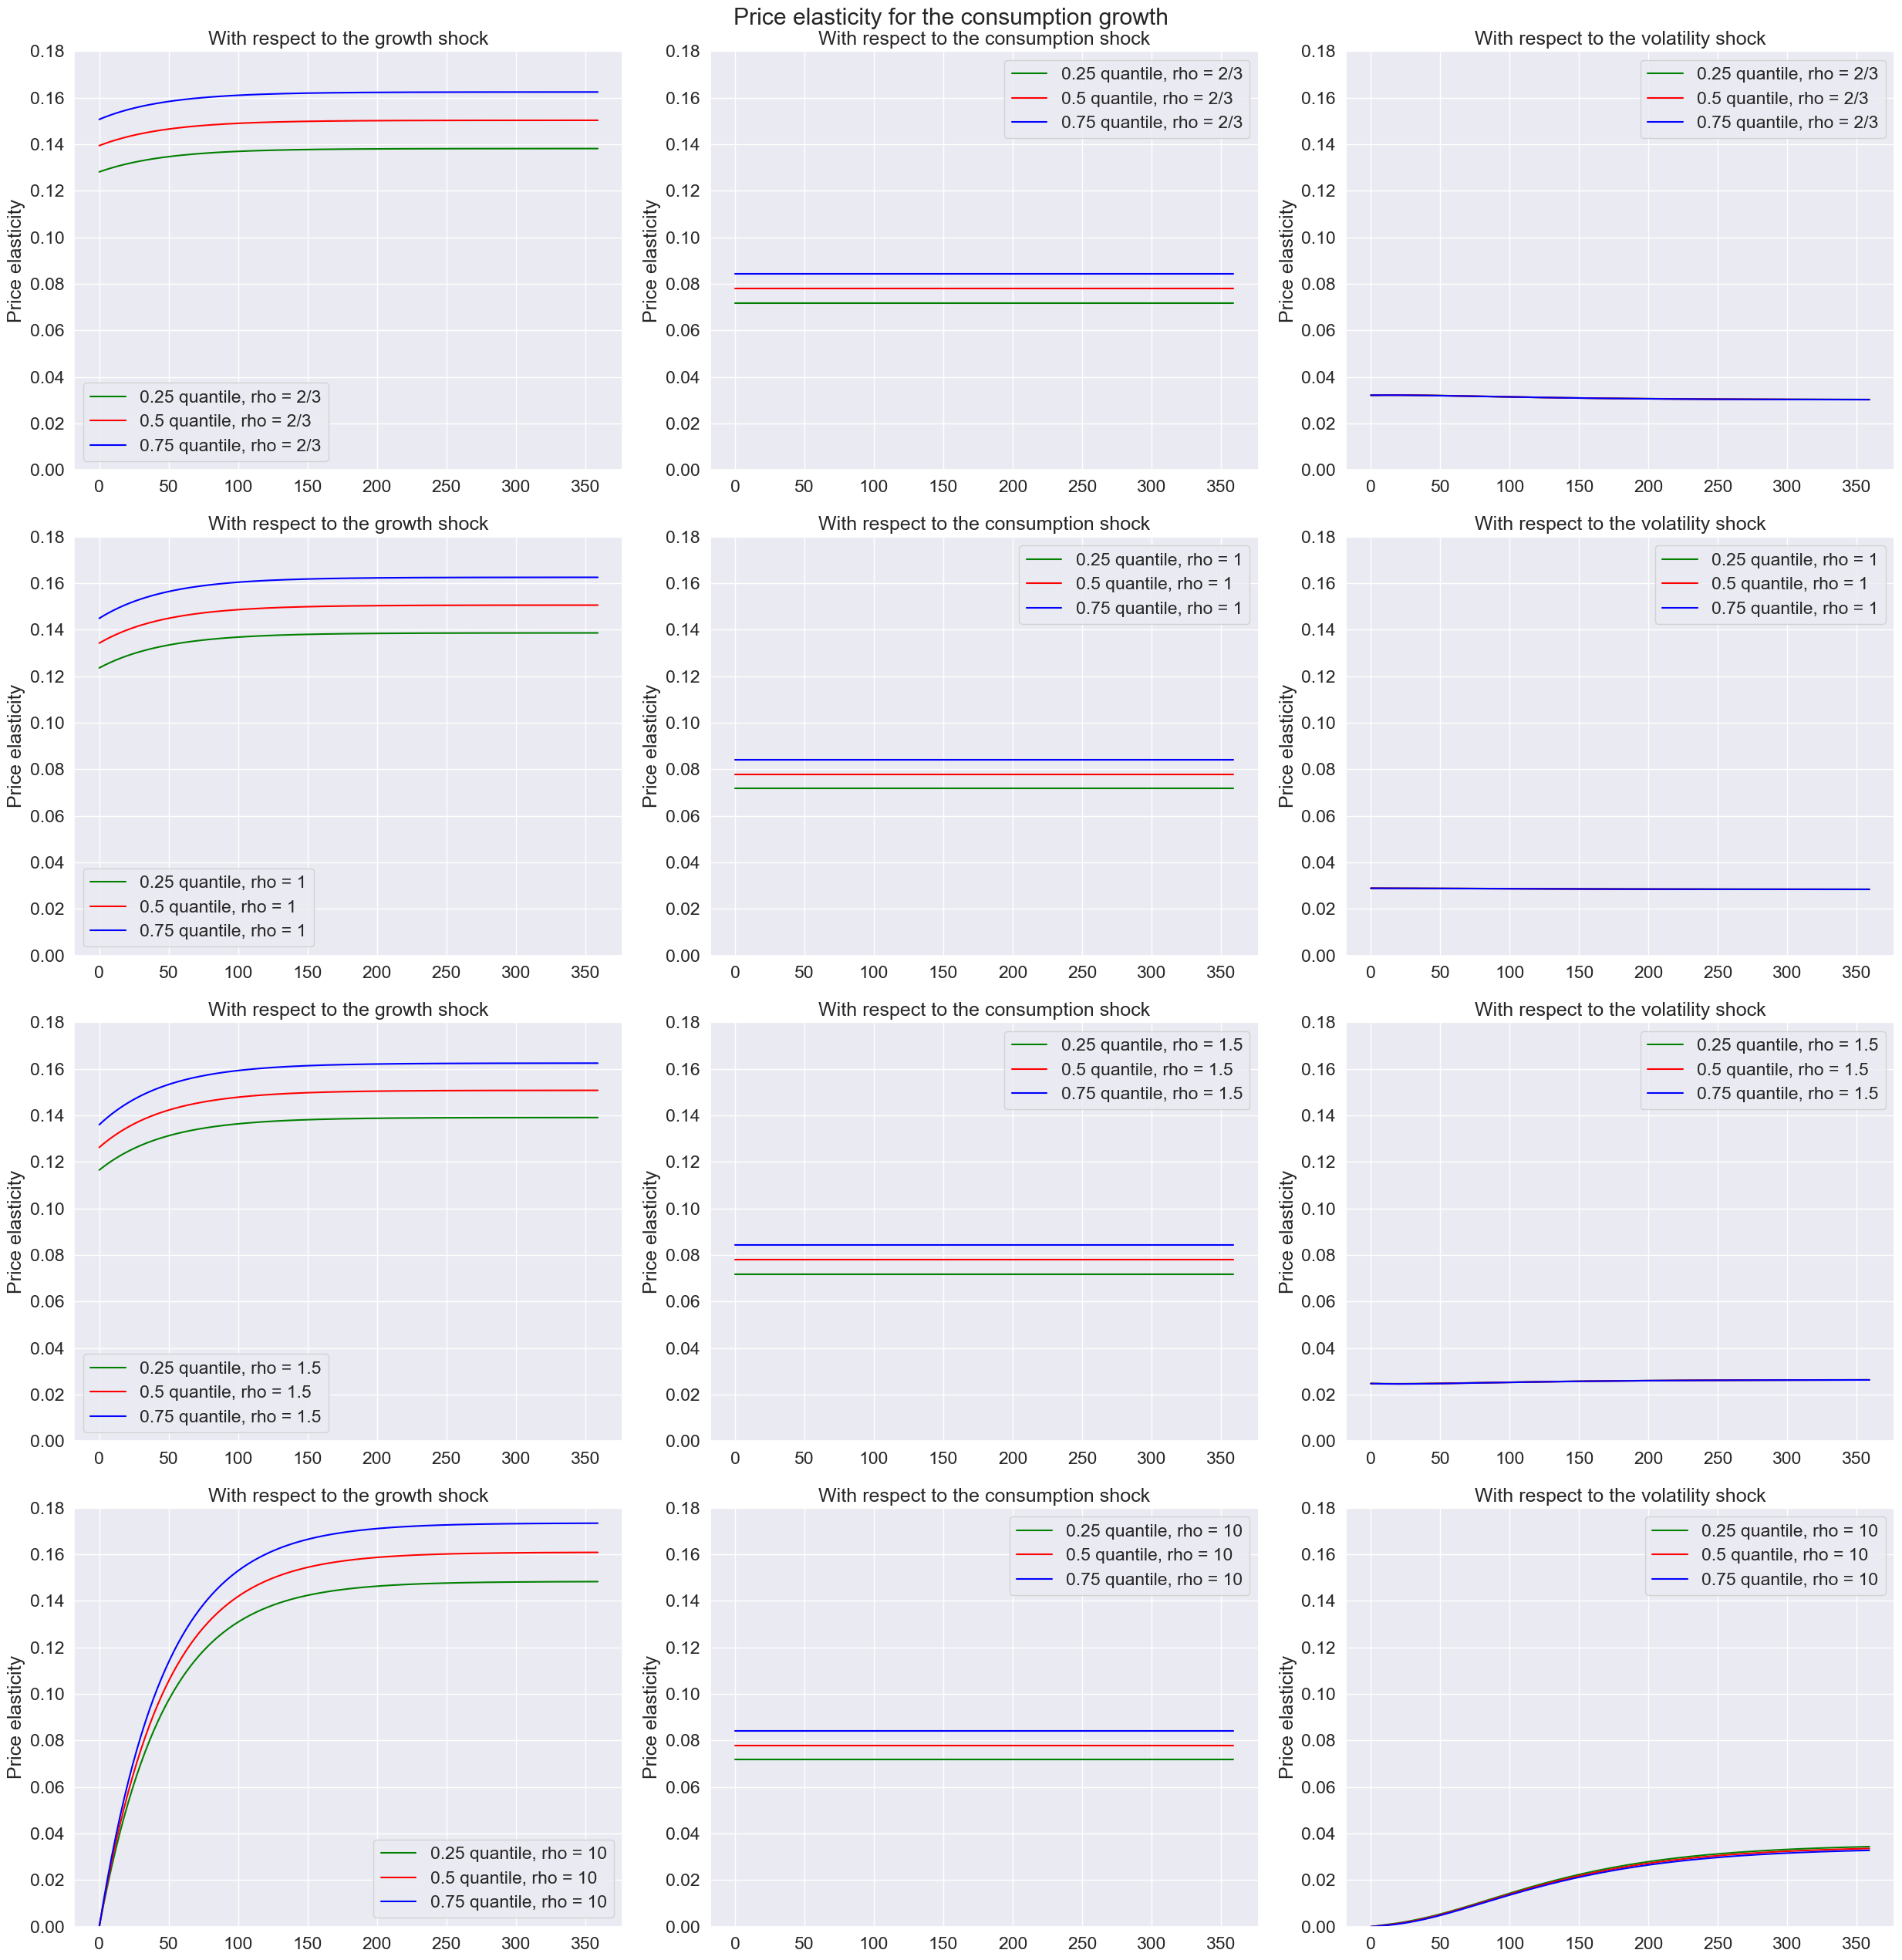

In [216]:
## Calculation for the log SDF when ρ = 2/3
β = res_006['args'][1]
ρ = res_006['args'][2]
n_Y, n_Z, n_W = res_006['var_shape']
log_beta = LinQuadVar({'c':np.array([[np.log(β)]])},(1,n_Z,n_W))

Z1_tp1 = res_006['no_N_res']['Z1_tp1']
Z2_tp1 = res_006['no_N_res']['Z2_tp1']
vmc_tp1 = next_period(res_006['util_sol']['vmc_t'], Z1_tp1,Z2_tp1)
rmc_t = res_006['util_sol']['rmc_t']
log_N = res_006['log_N']
log_SDF = log_beta +(ρ - 1)*(vmc_tp1 + gc_tp1 - rmc_t) - ρ*gc_tp1 + log_N

## Calculation for price elasticity for consumption growth when ρ = 2/3
price_elas_shock_0_006 = [price_elasticity(gc_tp1, log_SDF, Z1_tp1, Z2_tp1, T, shock=0, percentile=p) for p in [0.25, 0.5, 0.75]]
price_elas_shock_1_006 = [price_elasticity(gc_tp1, log_SDF, Z1_tp1, Z2_tp1, T, shock=1, percentile=p) for p in [0.25, 0.5, 0.75]]
price_elas_shock_2_006 = [price_elasticity(gc_tp1, log_SDF, Z1_tp1, Z2_tp1, T, shock=2, percentile=p) for p in [0.25, 0.5, 0.75]]

## Calculation for the log SDF when ρ = 1
β = res_010['args'][1]
ρ = res_010['args'][2]
n_Y, n_Z, n_W = res_010['var_shape']
log_beta = LinQuadVar({'c':np.array([[np.log(β)]])},(1,n_Z,n_W))

Z1_tp1 = res_010['no_N_res']['Z1_tp1']
Z2_tp1 = res_010['no_N_res']['Z2_tp1']
vmc_tp1 = next_period(res_010['util_sol']['vmc_t'], Z1_tp1,Z2_tp1)
rmc_t = res_010['util_sol']['rmc_t']
log_N = res_010['log_N']
log_SDF = log_beta +(ρ - 1)*(vmc_tp1 + gc_tp1 - rmc_t) - ρ*gc_tp1 + log_N

## Calculation for price elasticity for consumption growth when ρ = 1
price_elas_shock_0_010 = [price_elasticity(gc_tp1, log_SDF, Z1_tp1, Z2_tp1, T, shock=0, percentile=p) for p in [0.25, 0.5, 0.75]]
price_elas_shock_1_010 = [price_elasticity(gc_tp1, log_SDF, Z1_tp1, Z2_tp1, T, shock=1, percentile=p) for p in [0.25, 0.5, 0.75]]
price_elas_shock_2_010 = [price_elasticity(gc_tp1, log_SDF, Z1_tp1, Z2_tp1, T, shock=2, percentile=p) for p in [0.25, 0.5, 0.75]]

## Calculation for the log SDF when ρ = 1.5
β = res_015['args'][1]
ρ = res_015['args'][2]
n_Y, n_Z, n_W = res_015['var_shape']
log_beta = LinQuadVar({'c':np.array([[np.log(β)]])},(1,n_Z,n_W))

Z1_tp1 = res_015['no_N_res']['Z1_tp1']
Z2_tp1 = res_015['no_N_res']['Z2_tp1']
vmc_tp1 = next_period(res_015['util_sol']['vmc_t'], Z1_tp1,Z2_tp1)
rmc_t = res_015['util_sol']['rmc_t']
log_N = res_015['log_N']
log_SDF = log_beta +(ρ - 1)*(vmc_tp1 + gc_tp1 - rmc_t) - ρ*gc_tp1 + log_N

## Calculation for price elasticity for consumption growth when ρ = 1.5
price_elas_shock_0_015 = [price_elasticity(gc_tp1, log_SDF, Z1_tp1, Z2_tp1, T, shock=0, percentile=p) for p in [0.25, 0.5, 0.75]]
price_elas_shock_1_015 = [price_elasticity(gc_tp1, log_SDF, Z1_tp1, Z2_tp1, T, shock=1, percentile=p) for p in [0.25, 0.5, 0.75]]
price_elas_shock_2_015 = [price_elasticity(gc_tp1, log_SDF, Z1_tp1, Z2_tp1, T, shock=2, percentile=p) for p in [0.25, 0.5, 0.75]]

## Calculation for the log SDF when ρ = 10
β = res_100['args'][1]
ρ = res_100['args'][2]
n_Y, n_Z, n_W = res_100['var_shape']
log_beta = LinQuadVar({'c':np.array([[np.log(β)]])},(1,n_Z,n_W))

Z1_tp1 = res_100['no_N_res']['Z1_tp1']
Z2_tp1 = res_100['no_N_res']['Z2_tp1']
vmc_tp1 = next_period(res_100['util_sol']['vmc_t'], Z1_tp1,Z2_tp1)
rmc_t = res_100['util_sol']['rmc_t']
log_N = res_100['log_N']
log_SDF = log_beta +(ρ - 1)*(vmc_tp1 + gc_tp1 - rmc_t) - ρ*gc_tp1 + log_N

## Calculation for price elasticity for consumption growth when ρ = 10
price_elas_shock_0_100 = [price_elasticity(gc_tp1, log_SDF, Z1_tp1, Z2_tp1, T, shock=0, percentile=p) for p in [0.25, 0.5, 0.75]]
price_elas_shock_1_100 = [price_elasticity(gc_tp1, log_SDF, Z1_tp1, Z2_tp1, T, shock=1, percentile=p) for p in [0.25, 0.5, 0.75]]
price_elas_shock_2_100 = [price_elasticity(gc_tp1, log_SDF, Z1_tp1, Z2_tp1, T, shock=2, percentile=p) for p in [0.25, 0.5, 0.75]]

## Plot the price elasticity for consumption growth
fig, axes = plt.subplots(4,3, figsize = (25,26))
price_elas_shock_0 = pd.DataFrame([np.arange(T),price_elas_shock_0_006[0].flatten(),price_elas_shock_0_006[1].flatten(),price_elas_shock_0_006[2].flatten(),\
                                                price_elas_shock_0_010[0].flatten(),price_elas_shock_0_010[1].flatten(),price_elas_shock_0_010[2].flatten(),\
                                                price_elas_shock_0_015[0].flatten(),price_elas_shock_0_015[1].flatten(),price_elas_shock_0_015[2].flatten(),\
                                                price_elas_shock_0_100[0].flatten(),price_elas_shock_0_100[1].flatten(),price_elas_shock_0_100[2].flatten()]).T
price_elas_shock_0.columns = ['T','rho 006 0.25 quantile','rho 006 0.5 quantile','rho 006 0.75 quantile','rho 010 0.25 quantile','rho 010 0.5 quantile','rho 010 0.75 quantile',\
                              'rho 015 0.25 quantile','rho 015 0.5 quantile','rho 015 0.75 quantile','rho 100 0.25 quantile','rho 100 0.5 quantile','rho 100 0.75 quantile']
price_elas_shock_1 = pd.DataFrame([np.arange(T),-price_elas_shock_1_006[0].flatten(),-price_elas_shock_1_006[1].flatten(),-price_elas_shock_1_006[2].flatten(),\
                                               -price_elas_shock_1_010[0].flatten(),-price_elas_shock_1_010[1].flatten(),-price_elas_shock_1_010[2].flatten(),\
                                                -price_elas_shock_1_015[0].flatten(),-price_elas_shock_1_015[1].flatten(),-price_elas_shock_1_015[2].flatten(),\
                                               -price_elas_shock_1_100[0].flatten(),-price_elas_shock_1_100[1].flatten(),-price_elas_shock_1_100[2].flatten()]).T
price_elas_shock_1.columns = ['T','rho 006 0.25 quantile','rho 006 0.5 quantile','rho 006 0.75 quantile','rho 010 0.25 quantile','rho 010 0.5 quantile','rho 010 0.75 quantile',\
                              'rho 015 0.25 quantile','rho 015 0.5 quantile','rho 015 0.75 quantile','rho 100 0.25 quantile','rho 100 0.5 quantile','rho 100 0.75 quantile']
price_elas_shock_2 = pd.DataFrame([np.arange(T),price_elas_shock_2_006[0].flatten(),price_elas_shock_2_006[1].flatten(),price_elas_shock_2_006[2].flatten(),\
                                               price_elas_shock_2_010[0].flatten(),price_elas_shock_2_010[1].flatten(),price_elas_shock_2_010[2].flatten(),\
                                                price_elas_shock_2_015[0].flatten(),price_elas_shock_2_015[1].flatten(),price_elas_shock_2_015[2].flatten(),\
                                               price_elas_shock_2_100[0].flatten(),price_elas_shock_2_100[1].flatten(),price_elas_shock_2_100[2].flatten()]).T
price_elas_shock_2.columns = ['T','rho 006 0.25 quantile','rho 006 0.5 quantile','rho 006 0.75 quantile','rho 010 0.25 quantile','rho 010 0.5 quantile','rho 010 0.75 quantile',\
                              'rho 015 0.25 quantile','rho 015 0.5 quantile','rho 015 0.75 quantile','rho 100 0.25 quantile','rho 100 0.5 quantile','rho 100 0.75 quantile']
sns.lineplot(data = price_elas_shock_0,  x = 'T', y = 'rho 006 0.25 quantile', ax=axes[0,0], color = 'green',label = '0.25 quantile, rho = 2/3')
sns.lineplot(data = price_elas_shock_0,  x = 'T', y = 'rho 006 0.5 quantile', ax=axes[0,0], color = 'red',label = '0.5 quantile, rho = 2/3')
sns.lineplot(data = price_elas_shock_0,  x = 'T', y = 'rho 006 0.75 quantile', ax=axes[0,0], color = 'blue',label = '0.75 quantile, rho = 2/3')
sns.lineplot(data = price_elas_shock_0,  x = 'T', y = 'rho 010 0.25 quantile', ax=axes[1,0], color = 'green',label = '0.25 quantile, rho = 1')
sns.lineplot(data = price_elas_shock_0,  x = 'T', y = 'rho 010 0.5 quantile', ax=axes[1,0], color = 'red',label = '0.5 quantile, rho = 1')
sns.lineplot(data = price_elas_shock_0,  x = 'T', y = 'rho 010 0.75 quantile', ax=axes[1,0], color = 'blue',label = '0.75 quantile, rho = 1')
sns.lineplot(data = price_elas_shock_0,  x = 'T', y = 'rho 015 0.25 quantile', ax=axes[2,0], color = 'green',label = '0.25 quantile, rho = 1.5')
sns.lineplot(data = price_elas_shock_0,  x = 'T', y = 'rho 015 0.5 quantile', ax=axes[2,0], color = 'red',label = '0.5 quantile, rho = 1.5')
sns.lineplot(data = price_elas_shock_0,  x = 'T', y = 'rho 015 0.75 quantile', ax=axes[2,0], color = 'blue',label = '0.75 quantile, rho = 1.5')
sns.lineplot(data = price_elas_shock_0,  x = 'T', y = 'rho 100 0.25 quantile', ax=axes[3,0], color = 'green',label = '0.25 quantile, rho = 10')
sns.lineplot(data = price_elas_shock_0,  x = 'T', y = 'rho 100 0.5 quantile', ax=axes[3,0], color = 'red',label = '0.5 quantile, rho = 10')
sns.lineplot(data = price_elas_shock_0,  x = 'T', y = 'rho 100 0.75 quantile', ax=axes[3,0], color = 'blue',label = '0.75 quantile, rho = 10')

sns.lineplot(data = price_elas_shock_1,  x = 'T', y = 'rho 006 0.25 quantile', ax=axes[0,2], color = 'green',label = '0.25 quantile, rho = 2/3')
sns.lineplot(data = price_elas_shock_1,  x = 'T', y = 'rho 006 0.5 quantile', ax=axes[0,2], color = 'red',label = '0.5 quantile, rho = 2/3')
sns.lineplot(data = price_elas_shock_1,  x = 'T', y = 'rho 006 0.75 quantile', ax=axes[0,2], color = 'blue',label = '0.75 quantile, rho = 2/3')
sns.lineplot(data = price_elas_shock_1,  x = 'T', y = 'rho 010 0.25 quantile', ax=axes[1,2], color = 'green',label = '0.25 quantile, rho = 1')
sns.lineplot(data = price_elas_shock_1,  x = 'T', y = 'rho 010 0.5 quantile', ax=axes[1,2], color = 'red',label = '0.5 quantile, rho = 1')
sns.lineplot(data = price_elas_shock_1,  x = 'T', y = 'rho 010 0.75 quantile', ax=axes[1,2], color = 'blue',label = '0.75 quantile, rho = 1')
sns.lineplot(data = price_elas_shock_1,  x = 'T', y = 'rho 015 0.25 quantile', ax=axes[2,2], color = 'green',label = '0.25 quantile, rho = 1.5')
sns.lineplot(data = price_elas_shock_1,  x = 'T', y = 'rho 015 0.5 quantile', ax=axes[2,2], color = 'red',label = '0.5 quantile, rho = 1.5')
sns.lineplot(data = price_elas_shock_1,  x = 'T', y = 'rho 015 0.75 quantile', ax=axes[2,2], color = 'blue',label = '0.75 quantile, rho = 1.5')
sns.lineplot(data = price_elas_shock_1,  x = 'T', y = 'rho 100 0.25 quantile', ax=axes[3,2], color = 'green',label = '0.25 quantile, rho = 10')
sns.lineplot(data = price_elas_shock_1,  x = 'T', y = 'rho 100 0.5 quantile', ax=axes[3,2], color = 'red',label = '0.5 quantile, rho = 10')
sns.lineplot(data = price_elas_shock_1,  x = 'T', y = 'rho 100 0.75 quantile', ax=axes[3,2], color = 'blue',label = '0.75 quantile, rho = 10')

sns.lineplot(data = price_elas_shock_2,  x = 'T', y = 'rho 006 0.25 quantile', ax=axes[0,1], color = 'green',label = '0.25 quantile, rho = 2/3')
sns.lineplot(data = price_elas_shock_2,  x = 'T', y = 'rho 006 0.5 quantile', ax=axes[0,1], color = 'red',label = '0.5 quantile, rho = 2/3')
sns.lineplot(data = price_elas_shock_2,  x = 'T', y = 'rho 006 0.75 quantile', ax=axes[0,1], color = 'blue',label = '0.75 quantile, rho = 2/3')
sns.lineplot(data = price_elas_shock_2,  x = 'T', y = 'rho 010 0.25 quantile', ax=axes[1,1], color = 'green',label = '0.25 quantile, rho = 1')
sns.lineplot(data = price_elas_shock_2,  x = 'T', y = 'rho 010 0.5 quantile', ax=axes[1,1], color = 'red',label = '0.5 quantile, rho = 1')
sns.lineplot(data = price_elas_shock_2,  x = 'T', y = 'rho 010 0.75 quantile', ax=axes[1,1], color = 'blue',label = '0.75 quantile, rho = 1')
sns.lineplot(data = price_elas_shock_2,  x = 'T', y = 'rho 015 0.25 quantile', ax=axes[2,1], color = 'green',label = '0.25 quantile, rho = 1.5')
sns.lineplot(data = price_elas_shock_2,  x = 'T', y = 'rho 015 0.5 quantile', ax=axes[2,1], color = 'red',label = '0.5 quantile, rho = 1.5')
sns.lineplot(data = price_elas_shock_2,  x = 'T', y = 'rho 015 0.75 quantile', ax=axes[2,1], color = 'blue',label = '0.75 quantile, rho = 1.5')
sns.lineplot(data = price_elas_shock_2,  x = 'T', y = 'rho 100 0.25 quantile', ax=axes[3,1], color = 'green',label = '0.25 quantile, rho = 10')
sns.lineplot(data = price_elas_shock_2,  x = 'T', y = 'rho 100 0.5 quantile', ax=axes[3,1], color = 'red',label = '0.5 quantile, rho = 10')
sns.lineplot(data = price_elas_shock_2,  x = 'T', y = 'rho 100 0.75 quantile', ax=axes[3,1], color = 'blue',label = '0.75 quantile, rho = 10')

axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Price elasticity')
axes[0,0].set_title('With respect to the growth shock')
axes[0,0].set_ylim([0,0.18])
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Price elasticity')
axes[1,0].set_title('With respect to the growth shock')
axes[1,0].set_ylim([0,0.18])
axes[2,0].set_xlabel('')
axes[2,0].set_ylabel('Price elasticity')
axes[2,0].set_title('With respect to the growth shock')
axes[2,0].set_ylim([0,0.18])
axes[3,0].set_xlabel('')
axes[3,0].set_ylabel('Price elasticity')
axes[3,0].set_title('With respect to the growth shock')
axes[3,0].set_ylim([0,0.18])

axes[0,2].set_xlabel('')
axes[0,2].set_ylabel('Price elasticity')
axes[0,2].set_title('With respect to the volatility shock')
axes[0,2].set_ylim([0,0.18])
axes[1,2].set_xlabel('')
axes[1,2].set_ylabel('Price elasticity')
axes[1,2].set_title('With respect to the volatility shock')
axes[1,2].set_ylim([0,0.18])
axes[2,2].set_xlabel('')
axes[2,2].set_ylabel('Price elasticity')
axes[2,2].set_title('With respect to the volatility shock')
axes[2,2].set_ylim([0,0.18])
axes[3,2].set_xlabel('')
axes[3,2].set_ylabel('Price elasticity')
axes[3,2].set_title('With respect to the volatility shock')
axes[3,2].set_ylim([0,0.18])

axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Price elasticity')
axes[0,1].set_title('With respect to the consumption shock')
axes[0,1].set_ylim([0,0.18])
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('Price elasticity')
axes[1,1].set_title('With respect to the consumption shock')
axes[1,1].set_ylim([0,0.18])
axes[2,1].set_xlabel('')
axes[2,1].set_ylabel('Price elasticity')
axes[2,1].set_title('With respect to the consumption shock')
axes[2,1].set_ylim([0,0.18])
axes[3,1].set_xlabel('')
axes[3,1].set_ylabel('Price elasticity')
axes[3,1].set_title('With respect to the consumption shock')
axes[3,1].set_ylim([0,0.18])
fig.suptitle('Price elasticity for the consumption growth')
fig.tight_layout()
plt.show()

# Reference

[1], Bansal, Ravi, and Amir Yaron. "Risks for the long run: A potential resolution of asset pricing puzzles." The journal of Finance 59, no. 4 (2004): 1481-1509.

[2], Borovička, Jaroslav, and Lars Peter Hansen. "Term structure of uncertainty in the macroeconomy." In Handbook of Macroeconomics, vol. 2, pp. 1641-1696. Elsevier, 2016.

[3], Borovička, Jaroslav, and Lars Peter Hansen. "Examining macroeconomic models through the lens of asset pricing." Journal of Econometrics 183, no. 1 (2014): 67-90.

[4], Lombardo, Giovanni, and Harald Uhlig. "A theory of pruning." International Economic Review 59, no. 4 (2018): 1825-1836.